# King County House Prices

In this notebook we will do a Exploratory Data Analysis in the King County House Prices dataset to help a client who is in the real state business. He wants to expand his business to Seatle and he uses a very popular web search engine. He has asked us to analize the data to improve his approach when looking for new opportunities.

He is specially interested in proving these points:

    1. Renovated houses are more expensive than not renovated ones.
    2. One extra bedroom increases the price more than one extra bathroom.
    3. The biggest lots are situated far from the city center.


## Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Let's import the data and give it a first look.

In [2]:
df = pd.read_csv("King_County_House_prices_dataset.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape)
df.describe()

(21597, 21)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


It seems there are some missing values. We will deal with it later on.
What we can do is to convert to dates the column ***date*** and to a number the column ***sqft_basement***

In [4]:
df_expanded = df
df_expanded["date"] = pd.to_datetime(df["date"],format = "%m/%d/%Y")
df_expanded["sqft_basement"].replace("?","0.0", inplace = True)
df_expanded["sqft_basement"] = df_expanded["sqft_basement"].astype(float, copy = True)
df_expanded["date_int"] = df_expanded["date"].astype(int)

Let's check which variables are  important to predict the price.

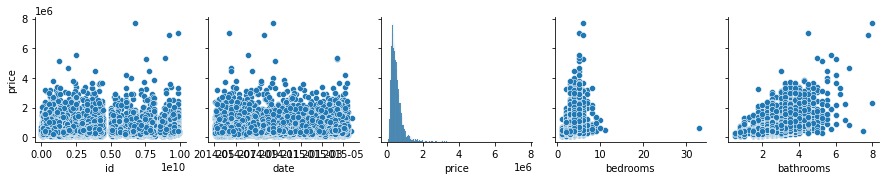

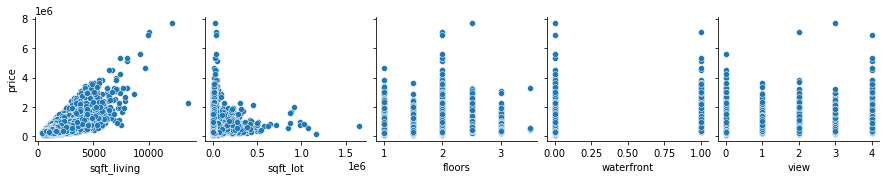

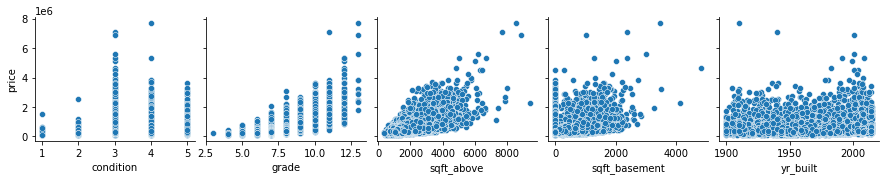

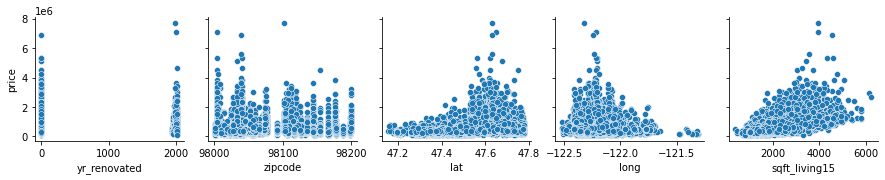

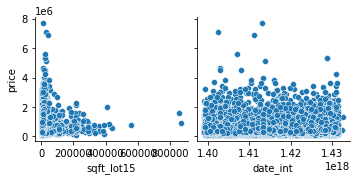

In [5]:
for i in range(0, len(df_expanded.columns), 5):
    sns.pairplot(data=df_expanded,
                x_vars=df_expanded.columns[i:i+5],
                y_vars=['price'])

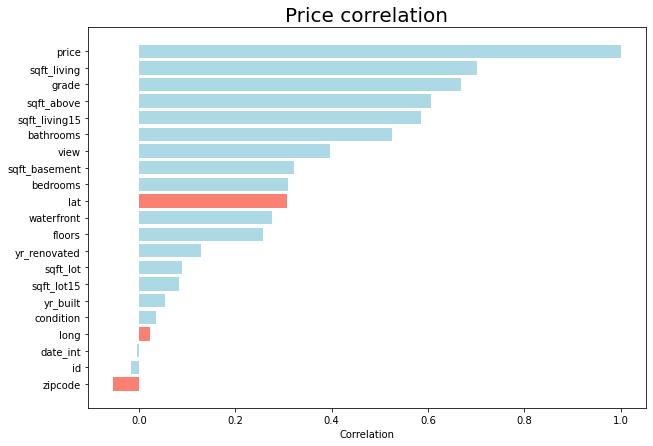

In [6]:
corr_matrix = df_expanded.corr()
corr_matrix["price"].sort_values(ascending = False)
color_list = ["lightblue"] * len(corr_matrix["price"].to_list())

color_list[-1] = "salmon"
color_list[-4] = "salmon"
color_list[9] = "salmon"
ordered_corr = corr_matrix.sort_values("price",ascending = False)["price"]

y_pos = np.arange(len(ordered_corr))

fig, ax = plt.subplots(figsize = (10,7))

hbars = ax.barh(y_pos, ordered_corr, align='center', color =color_list)
ax.set_yticks(y_pos)
ax.set_yticklabels(ordered_corr.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Price correlation', fontsize = 20)
plt.savefig('pictures/position_correlation.png', transparent=True)

We can see the variables related with position, marked in red, score surprisingly bad. But we know that there are always some neighborhoods more popular than others. Let's investigate this.

### Location

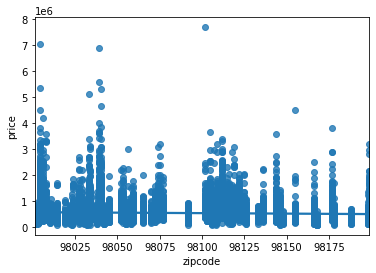

In [7]:
sns.regplot(x = "zipcode", y = "price", data = df);

The zip codes number were given with another criteria, that is why there is no correlation with the prices.

In [8]:
#Only used for plots. Not implemented in de model

df_expanded ["sqft_price"]= df["price"]/df["sqft_living"]
df_expanded ["sqft_lot_price"]= df["price"]/df["sqft_lot"]

df_map = df_expanded[["sqft_price","sqft_lot_price","sqft_living","sqft_lot","lat","long","zipcode","waterfront"]].groupby("zipcode").mean()
houses_in_zip = df[["zipcode","id"]].groupby("zipcode").size()
df_map = df_map.join([houses_in_zip])
df_map.rename(columns={0:"zip_size"}, inplace = True)


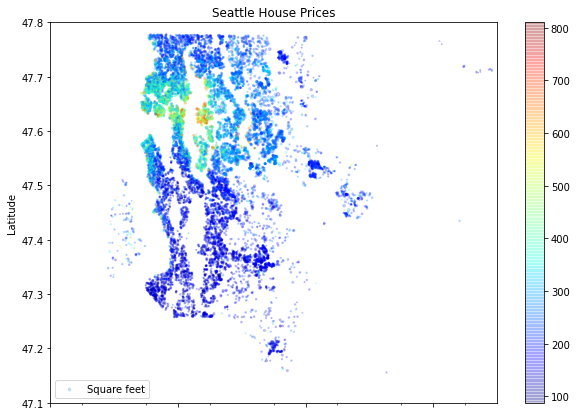

In [9]:
df_expanded.plot(kind="scatter",
        x="long", xlabel = "Longitude",
        y="lat", ylabel = "Latitude",
        alpha=0.2, figsize= (10,7),
        s=df["sqft_living"]/1000, label="Square feet", 
        c=df["sqft_price"],cmap=plt.get_cmap("jet"),colorbar = True, 
        xlim = ( -122.7,-121.3), ylim = (47.1, 47.8),
        xticks = list(np.linspace(-122.7, -121.1, 5)),
        legend = True,
        title = "Seattle House Prices"
        );
plt.savefig('Pictures/1_sqft_price.png', transparent=True)

Looking at the prices on a map, we see clearly that there is a very demanded area.

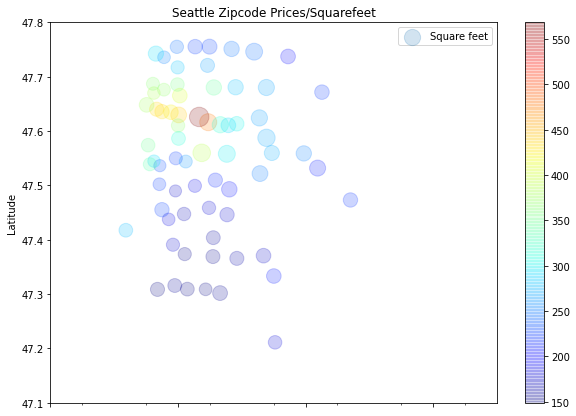

In [10]:
df_map.plot(kind="scatter",
        x="long", xlabel = "Longitude",
        y="lat", ylabel = "Latitude",
        alpha=0.2, figsize= (10,7),
        s=df_map["sqft_living"]/10, label="Square feet", 
        c=df_map["sqft_price"],cmap=plt.get_cmap("jet"),colorbar = True, 
        xlim = ( -122.7,-121.3), ylim = (47.1, 47.8),
        xticks = list(np.linspace(-122.7, -121.1, 5)),
        legend = True,
        title = "Seattle Zipcode Prices/Squarefeet"
        );
plt.savefig('Pictures/2_sqft_price.png', transparent=True)

Let us create a new column that relates the distance to the city center, to the -0.4 power.

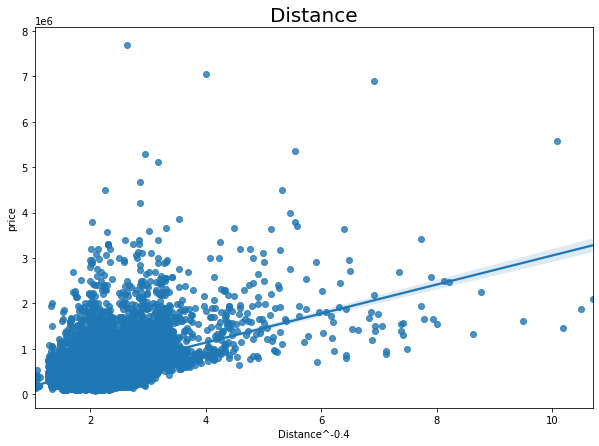

In [11]:
# Distance to center option

price_center = [47.625840,-122.233540] # Center of zipcode 98039
df_expanded["distance_to_center"] = 1/((df_expanded["lat"]- price_center[0])**2 + (df_expanded["long"]- price_center[1])**2)**0.2
df_total = df_expanded

fig, ax = plt.subplots(figsize = (10,7))

sns.regplot(x = "distance_to_center", y = "price", data = df_total) 
ax.set_xlabel('Distance^-0.4')
ax.set_title('Distance', fontsize = 20)

plt.savefig('pictures/distance_scatter.png', transparent=True)

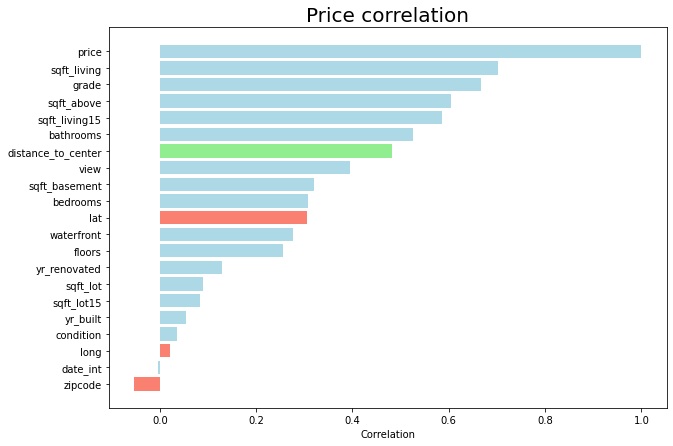

In [12]:
corr_matrix = df_total.drop(["sqft_price", "sqft_lot_price","id"], axis = 1).corr()
corr_matrix["price"].sort_values(ascending = False)

color_list = ["lightblue"] * len(corr_matrix["price"].to_list())
color_list[-1] = "salmon"
color_list[-3] = "salmon"
color_list[10] = "salmon"
color_list[6] = "lightgreen"
ordered_corr = corr_matrix.sort_values("price",ascending = False)["price"]

y_pos = np.arange(len(ordered_corr))

fig, ax = plt.subplots(figsize = (10,7))

hbars = ax.barh(y_pos, ordered_corr, align='center', color =color_list)
ax.set_yticks(y_pos)
ax.set_yticklabels(ordered_corr.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Price correlation', fontsize = 20)
plt.savefig('Pictures/position_correlation_2.png', transparent=True)

It is great! It improves the other three variables. We will use it for our model instead of them.

### 1st Hypothesis 

_Renovated houses are more expensive than not renovated ones._

To check this afirmation can plot the square feet prices distribution for each of the cases

Not renovated    17011
No data           3842
Renovated          744
Name: renovated, dtype: int64


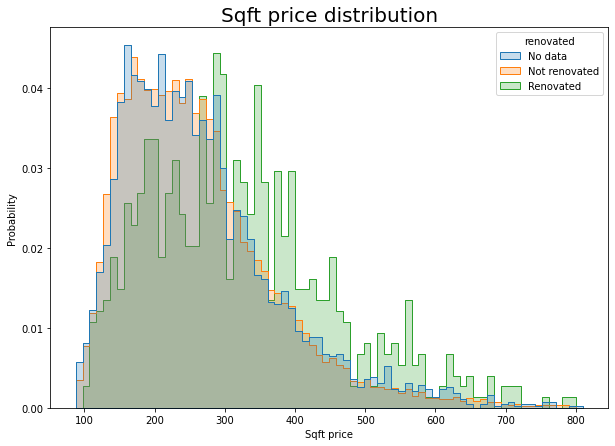

In [13]:
df_total["yr_renovated"].fillna(-4, inplace= True) # TEMPORARY just for plot
renovated_bins = [-5,-1,1,3000] 
df_total["renovated"] = pd.cut(df_total["yr_renovated"],bins = renovated_bins, labels = ["No data","Not renovated", "Renovated"])
print(df_total["renovated"].value_counts())

fig, ax = plt.subplots(figsize = (10,7))

ax.set_xlabel('Sqft price')
ax.set_title('Sqft price distribution', fontsize = 20)

sns.histplot(data= df_total, x="sqft_price", hue="renovated",stat = "probability",common_norm=False, element="step", color = color_list)
plt.savefig('Pictures/renovation_prices.png', transparent=True);

We see that the prices for a renovated square foot (green) are ahead of the not renovated (orange).

### 2nd Hypothesis 

_One extra bedroom increases the price more than one extra bathroom._

This is important when renovating the house to maximize the benefits. To check this we will fit a simple linear regression for each of the cases and we will compare the slopes.

In [14]:
import statsmodels.api as sm

bedrooms = sm.OLS(df_total["price"], df_total["bedrooms"]).fit()

bathrooms = sm.OLS(df_total["price"], df_total["bathrooms"]).fit()

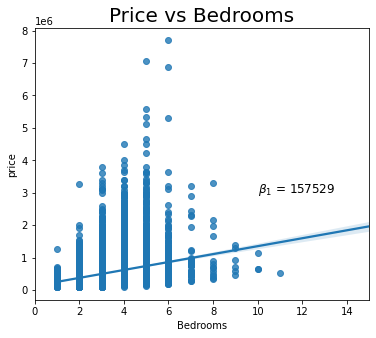

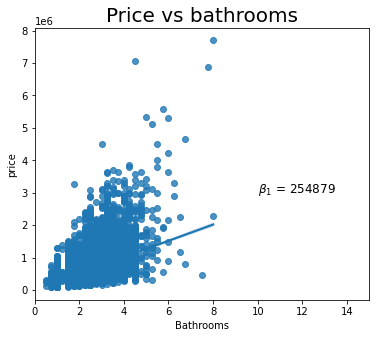

In [15]:
fig, ax = plt.subplots(figsize = (6,5))

sns.regplot(data= df_total, x="bedrooms", y="price")
ax.set_xlabel('Bedrooms')
ax.set_title('Price vs Bedrooms', fontsize = 20)
ax.text(10,3000000,r'$\beta_1$ = ' + str(round(bedrooms.params[0])), fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,15])

plt.savefig('Pictures/bedrooms_prices.png', transparent=True)

fig, ax1 = plt.subplots(figsize = (6,5))

sns.regplot(data= df_total, x = "bathrooms" ,y = "price")
ax1.set_title('Price vs bathrooms', fontsize = 20)
ax1.set_xlabel('Bathrooms')
ax1.text(10,3000000,r'$\beta_1$ = ' + str(round(bathrooms.params[0])), fontsize = 12)
axes = plt.gca()
axes.set_xlim([0,15])
plt.savefig('Pictures/bathrooms_prices.png', transparent=True)

So we can reject the hypothesis. Adding one extra bathroom actually leads to higher prices. We will check this again when we fit the multiple linear regression

### 3nd Hypothesis 

_The biggest lots are situated far from the city center._


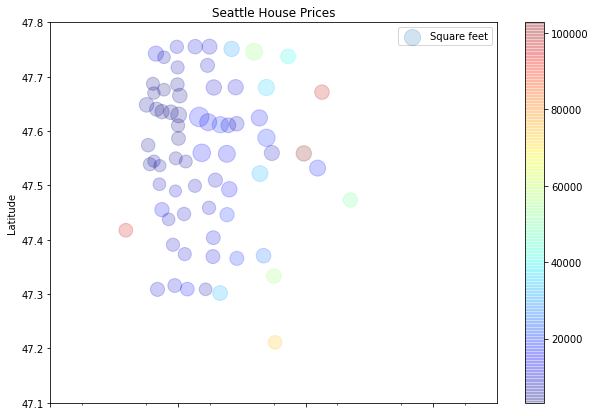

In [16]:
df_total["sqft_garden"] = df_total["sqft_lot"] - df_total["sqft_living"]

df_garden = df_total[["sqft_garden","sqft_living","sqft_lot","lat","long","zipcode"]].groupby("zipcode").mean()

df_garden.plot(kind="scatter",
        x="long", xlabel = "Longitude",
        y="lat", ylabel = "Latitude",
        alpha=0.2, figsize= (10,7),
        s=df_garden["sqft_living"]/10, label="Square feet", 
        c=df_garden["sqft_lot"],cmap=plt.get_cmap("jet"),colorbar = True, 
        xlim = ( -122.7,-121.3), ylim = (47.1, 47.8),
        xticks = list(np.linspace(-122.7, -121.1, 5)),
        legend = True,
        title = "Seattle House Prices"
        );

plt.savefig('Pictures/1_sqft_lots.png', transparent=True)

In general yes but there are some exceptions like the plot shows.

### Built and Renovation Year

Now let us focus on the time variables that are at the bottom of the list of correlation.

We could create a new variable that takes ***yr_renovated*** if it exists and ***yr_built*** if not.

In [17]:
df_total["yr_renovated"].replace(-4,0, inplace= True)
df_total["view"].fillna(0.0, inplace = True)
df_total["waterfront"].fillna(0.0, inplace = True)
    
df_total["yr_equivalent"] = df_total["yr_built"].where(df_total["yr_renovated"] == 0.0, other = df_total["yr_renovated"])

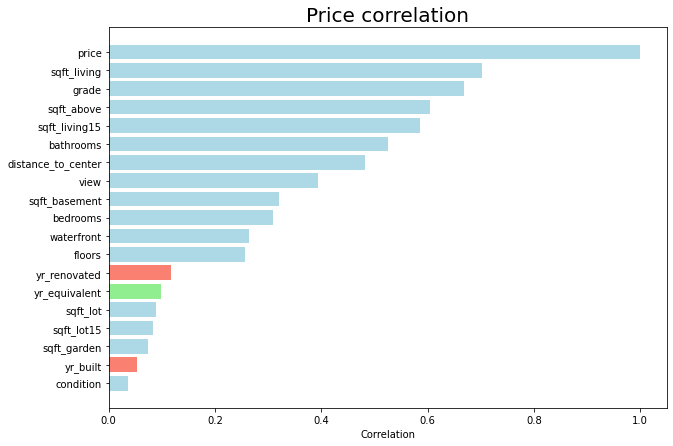

In [18]:
corr_matrix = df_total.drop(["sqft_price", "sqft_lot_price","long","lat","zipcode","id", "date_int"], axis = 1).corr()
corr_matrix["price"].sort_values(ascending = False)

color_list = ["lightblue"] * len(corr_matrix["price"].to_list())
color_list[-2] = "salmon"
color_list[-7] = "salmon"
color_list[-6] = "lightgreen"
ordered_corr = corr_matrix.sort_values("price",ascending = False)["price"]

y_pos = np.arange(len(ordered_corr))

fig, ax = plt.subplots(figsize = (10,7))

hbars = ax.barh(y_pos, ordered_corr, align='center', color =color_list)
ax.set_yticks(y_pos)
ax.set_yticklabels(ordered_corr.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Price correlation', fontsize = 20);
plt.savefig('Pictures/time.png', transparent=True)

In [19]:
#Used to feed kepler.gl and generate a nice looking plot

df_map.to_csv("df_map.csv")
df_total.to_csv("df_total.csv")

## Preparing the Data

In [20]:
df_real = pd.read_csv("King_County_House_prices_dataset.csv")

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_real, test_size=0.2, random_state = 10)

In [22]:
def house_cleaning(df_local):
    
    df_local["sqft_basement"].replace("?","0.0", inplace = True)
    df_local["sqft_basement"] = df_local["sqft_basement"].astype(float, copy = True)
    
    df_local["distance_to_center"] = 1/((df_expanded["lat"]- price_center[0])**2 + (df_expanded["long"]- price_center[1])**2)**0.2
    
    df_local["yr_renovated"].fillna(0.0, inplace = True)
    df_local["view"].fillna(0.0, inplace = True)
    df_local["waterfront"].fillna(0.0, inplace = True)

    df_local["yr_equivalent"] = df_local["yr_built"].where(df_local["yr_renovated"] == 0.0, other = df_local["yr_renovated"])
    
    target = df_local["price"]
    df_local.drop(["price","date", "id","zipcode", "long", "lat"], axis = 1, inplace = True) 
    variables = df_local 
    
    return (variables, target)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

housing, labels = house_cleaning(train_set)
housing_prepared = pipeline.fit_transform(housing)

housing2, labels2 = house_cleaning(test_set)
housing_prepared2 = pipeline.fit_transform(housing2)

## Fitting and Score

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()    

In [31]:
housing.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'distance_to_center', 'yr_equivalent'],
      dtype='object')

In [26]:
df_scores = pd.DataFrame(columns = ["MSE_train", "RMSE_train", "r2_train", "r2_adj_train","MSE_test", "RMSE_test", "r2_test", "r2_adj_test", "num_variables"])
count = 1

for i in range(1,housing_prepared.shape[1] + 1):
    
    for j in range(10):
        
        index = np.sort(np.random.choice(range(housing_prepared.shape[1]), replace = False , size = i))

        lin_reg.fit(housing_prepared[:,index],labels)

        housing_predictions = lin_reg.predict(housing_prepared[:,index])
        lin_mse = mean_squared_error(labels, housing_predictions)
        lin_rmse = np.sqrt(lin_mse)
        lin_r2 = r2_score(labels, housing_predictions)
        lin_r2_adj = 1-(1-lin_r2)*((len(housing_prepared[:,index])-1)/(len(housing_prepared[:,index])-len(housing_prepared[0])-1))

        housing_predictions2 = lin_reg.predict(housing_prepared2[:,index])
        lin_mse2 = mean_squared_error(labels2, housing_predictions2)
        lin_rmse2 = np.sqrt(lin_mse2)
        lin_r22 = r2_score(labels2, housing_predictions2)
        lin_r2_adj2 = 1-(1-lin_r22)*((len(housing_prepared2[:,index])-1)/(len(housing_prepared2[:,index])-len(housing_prepared2[0])-1))
         
        index_str = ["%.0f" % number for number in index]
        variables = ", ".join(index_str)
        
        model_i = pd.DataFrame( {"MSE_train" : lin_mse,
                                 "RMSE_train": lin_rmse, 
                                 "r2_train" : lin_r2, 
                                 "r2_adj_train" : lin_r2_adj,
                                 "MSE_test" : lin_mse2,
                                 "RMSE_test" : lin_rmse2, 
                                 "r2_test" : lin_r22, 
                                 "r2_adj_test" :lin_r2_adj2,
                                 "variables" : variables, 
                                 "num_variables" : i}, 
                               index = [count])

        count += 1
        df_scores = pd.concat([df_scores, model_i])

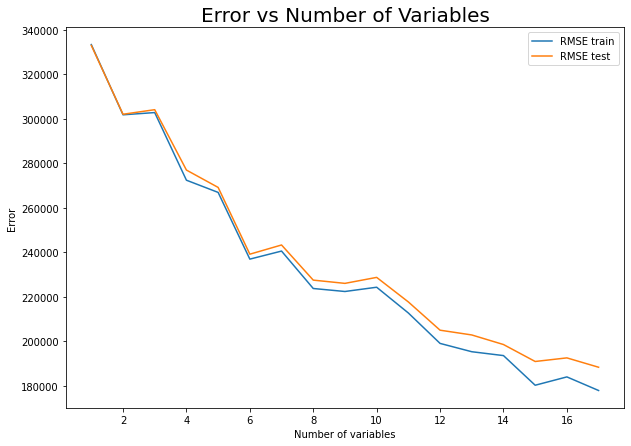

In [27]:
scores = df_scores.groupby("num_variables").mean().reset_index()

fig, ax = plt.subplots(figsize = (10,7))

sns.lineplot(x = "num_variables", y = "RMSE_train", data = scores, label = "RMSE train") 
sns.lineplot(x = "num_variables", y = "RMSE_test", data = scores, label = "RMSE test") 
ax.set_xlabel('Number of variables')
ax.set_ylabel('Error')
ax.set_title('Error vs Number of Variables', fontsize = 20)
ax.legend()

plt.savefig('pictures/Error_var.png', transparent=True)

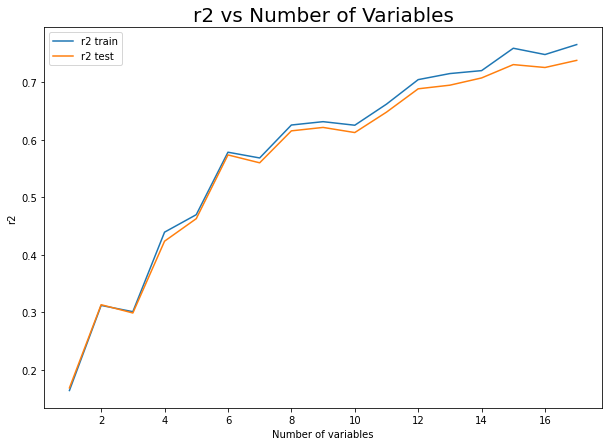

In [28]:
scores = df_scores.groupby("num_variables").mean().reset_index()

fig, ax = plt.subplots(figsize = (10,7))

sns.lineplot(x = "num_variables", y = "r2_train", data = scores, label = "r2 train") 
sns.lineplot(x = "num_variables", y = "r2_test", data = scores, label = "r2 test")

ax.set_xlabel('Number of variables')
ax.set_ylabel('r2')
ax.set_title('r2 vs Number of Variables', fontsize = 20)
ax.legend()

plt.savefig('pictures/r2_var.png', transparent=True)

In [29]:
df_scores[df_scores["RMSE_test"] == df_scores["RMSE_test"].min()]

,MSE_train,RMSE_train,r2_train,r2_adj_train,MSE_test,RMSE_test,r2_test,r2_adj_test,num_variables,variables
148,3.165296e+10,177912.780009,0.765283,0.765051,3.542961e+10,188227.559049,0.738222,0.737188,15,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16"


In [30]:
coef = lin_reg.coef_

for i in range(len(housing.columns)):
    print(housing.columns[i]," : " ,coef[i])

bedrooms  :  -33311.86463543659
bathrooms  :  24459.651918617164
sqft_living  :  115654.49422593873
sqft_lot  :  9070.606869671474
floors  :  4644.510108814041
waterfront  :  54982.33338239681
view  :  40134.6858441566
condition  :  13682.581192789285
grade  :  100983.71283863892
sqft_above  :  43834.7175128005
sqft_basement  :  3628.2629601600647
yr_built  :  -71836.93820988554
yr_renovated  :  -2717.481627635678
sqft_living15  :  8506.508561153281
sqft_lot15  :  -829.0503016496125
distance_to_center  :  134902.80647555875
yr_equivalent  :  17550.37937495354
